Installation of necessary Libraries

In [84]:
pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
pip install wordsegment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
pip install stemming

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


-------------------------------------------------------------
Importing the Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [90]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('punkt')  # Download the required data for NLTK's tokenizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwordsenglish = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--------------------------------------------------------
StopWords in Arabic Urdu

In [91]:
# stopwords = set(stopwords.words('urdu'))
#------------------------------------------
# from stop_words import get_stop_words
# stopwords = get_stop_words('urdu')
stopwords_urdu = {
    'اس', 'انکہ', 'انہوں', 'انہیں', 'انہی', 'اپ', 'اپنا', 'اپنی', 'اپنے', 'اگر', 'اگرچہ', 'اور', 'ایسا', 'ایسی', 'ایسے', 'ایک', 'بہت', 'تاکہ', 'تب', 'تو', 'تک', 'تھا', 'تھیں', 'تھی', 'تھے', 'جبکہ', 'جس', 'جسے', 'جن', 'جو', 'حالانکہ', 'خود', 'در', 'درمیان', 'دو', 'دور', 'دوسرے',
    'ذریعے', 'رکھا', 'زیادہ', 'سابقہ', 'ساتھ', 'سامنے', 'شاید', 'صورت', 'ضرور', 'ضرورت', 'طرح', 'طور', 'ظاہر', 'علاوہ', 'عین', 'غیر', 'فی', 'قبل', 'قطعن', 'لازم', 'لئے', 'لگتا', 'لگتی', 'لگتے', 'لگیں', 'لگی', 'لگے', 'مجھ', 'مجھے', 'مزید', 'مطابق', 'مقابل', 'من', 'منظور', 'میں', 'میرا',
    'میری', 'میرے', 'نہیں', 'وار', 'واقعی', 'والا', 'والوں', 'والی', 'والے', 'وغیرہ', 'ٹو', 'پر', 'پوری', 'پھر', 'چاہئے', 'چکے', 'چکی', 'چکیں', 'چکے', 'چھوٹی', 'چھوٹے', 'چہیے', 'چیز', 'ڈالیں', 'کئی', 'کافی', 'کبھی', 'کر', 'کرتا', 'کرتی', 'کرتے', 'کرنا', 'کرنے', 'کرو', 'کریں', 'کریں',
    'کرے', 'کس', 'کسی', 'کم', 'کوئی', 'کون', 'کچھ', 'کہ', 'کہا', 'کہتے', 'کہیں', 'کہیں', 'کہے', 'کی', 'کیا', 'کیسے', 'کیوں', 'کے', 'گئی', 'گئے', 'گا', 'گو', 'ہر', 'ہم', 'ہمارا', 'ہماری', 'ہمارے', 'ہو', 'ہوئی', 'ہوئیں', 'ہوئے', 'ہوا', 'ہوتا', 'ہوتی', 'ہوتے', 'ہونا', 'ہونگے', 'ہونی', 'ہونے',
    'ہوں', 'ہی', 'ہیں', 'ہیں', 'یا', 'یعنی', 'یقیناً', 'یہ', 'یہاں', 'یہی', 'یہیں', 'یہے', 'یے', 'ے'
}
print(stopwords_urdu)

{'چھوٹے', 'کون', 'یا', 'کیسے', 'سامنے', 'چکیں', 'انہیں', 'طور', 'تاکہ', 'رکھا', 'پر', 'مطابق', 'علاوہ', 'لگتا', 'جو', 'دور', 'میں', 'ایک', 'مجھے', 'تھے', 'قبل', 'اپنی', 'والی', 'وار', 'زیادہ', 'کہے', 'اگر', 'اپ', 'چکے', 'اور', 'کرتا', 'ضرورت', 'کرتی', 'کے', 'ہوئی', 'کیا', 'ہیں', 'کرنا', 'ہوئیں', 'کسی', 'کی', 'ہونے', 'جسے', 'ہمارے', 'نہیں', 'ظاہر', 'واقعی', 'یعنی', 'تو', 'وغیرہ', 'چیز', 'چاہئے', 'کرو', 'تک', 'کر', 'کہیں', 'سابقہ', 'چہیے', 'یقیناً', 'میرا', 'غیر', 'پھر', 'ہمارا', 'کئی', 'کوئی', 'یہی', 'یہے', 'لگے', 'منظور', 'تب', 'ڈالیں', 'ہوا', 'دوسرے', 'کرنے', 'ٹو', 'ہوئے', 'ایسے', 'یہیں', 'لگتے', 'کہا', 'اپنا', 'دو', 'لگیں', 'ایسی', 'لگی', 'ہر', 'ہونا', 'مزید', 'تھا', 'ہم', 'کبھی', 'انکہ', 'حالانکہ', 'چھوٹی', 'کریں', 'بہت', 'ہوتی', 'من', 'میری', 'مقابل', 'ہو', 'یہ', 'اگرچہ', 'پوری', 'قطعن', 'کم', 'ساتھ', 'شاید', 'کہتے', 'مجھ', 'کس', 'ہی', 'ے', 'لازم', 'ہوتے', 'میرے', 'انہوں', 'صورت', 'کچھ', 'کرتے', 'ہوتا', 'گئے', 'تھیں', 'در', 'درمیان', 'ہونگے', 'والوں', 'کافی', 'ذریعے', 'گئی', 'جس', 

---------------------------------------------------------------------
Stemming of Urdu Tweet

In [92]:
# from stemming.uroot import URootLemmatizer
# stemmer = URootLemmatizer()
# def urdu_stemmer(word):
#     return stemmer.uroot(word)
#-------------------------------------
# stemmer = nltk.SnowballStemmer('urdu')
suffixes = {
    1: ["وں", "وان", "یں", "ہں", "ہاں", "ات", "واں", "وے", "یاں", "وں"],
    2: ["گا", "گی", "گے", "ںگا", "ںگی", "ںگے"],
    3: ["آئیں", "آئے"],
    4: ["آتا", "آتی", "آتے", "انا", "انی", "انے", "یںگا", "یںگی", "یںگے"],
    5: ["آکے"],
    6: ["وریں", "وری", "ورے"],
    7: ["زاد", "زائی", "زائے", "زیادہ", "یعانی", "یعنی"],
    8: ["ترین", "تریں", "ترے"],
    9: ["گیاں", "گیان", "ہدیں"],
    10: ["آتیں"],
    11: ["تراں"],
    12: ["والا", "والی", "والے"],
    13: ["کٹا", "کٹی", "کٹے"],
    14: ["جانا", "جانی", "جانے"],
    15: ["وراں"],
    16: ["زادی", "زادے"],
    17: ["خانہ", "گاں"],
    18: ["گری", "گرے"],
    19: ["گیلہ", "گیلے"],
    20: ["گھراں"],
}

word = "میں"

for length in range(20, 0, -1):
    if len(word) > length:
        for suffix in suffixes.get(length, []):
            if word.endswith(suffix):
                word = word[:-length]
                break

print(word)


می


In [93]:
df = pd.read_csv('/content/Hate Speech Detection in Arabic Urdu -  labeled_data.csv.csv')

In [94]:
df.head()

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: ایک عورت کے طور پر آپ ک...
1,1,3,0,3,0,1,!!!!! RT @mleew17: لڑکا ٹھنڈا ہے... ٹائیگا ڈا...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbab...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based وہ ای...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: آپ نے میرے ...


In [95]:
print(df.iloc[0])

Serial No.                                                            0
Count                                                                 3
Hate Speech                                                           0
Offensive Language                                                    0
Neither                                                               3
Class                                                                 2
Tweet                  !!! RT @mayasolovely: ایک عورت کے طور پر آپ ک...
Name: 0, dtype: object


In [96]:
print(df.loc[0, 'Tweet'])

 !!! RT @mayasolovely: ایک عورت کے طور پر آپ کو اپنے گھر کی صفائی کے بارے میں شکایت نہیں کرنی چاہیے۔ &amp; ایک آدمی ہونے کے ناطے آپ کو ہمیشہ کچرا اٹھانا چاہیے...


In [97]:
df["Labels"] = df["Class"].map({0:"Hate Speech", 1 :"Offensive Language",2:"No hate and Offensive Speech"})

In [98]:
df.head()

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet,Labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: ایک عورت کے طور پر آپ ک...,No hate and Offensive Speech
1,1,3,0,3,0,1,!!!!! RT @mleew17: لڑکا ٹھنڈا ہے... ٹائیگا ڈا...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbab...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based وہ ای...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: آپ نے میرے ...,Offensive Language


In [99]:
df = df[["Tweet","Labels"]]

<Axes: xlabel='Labels', ylabel='count'>

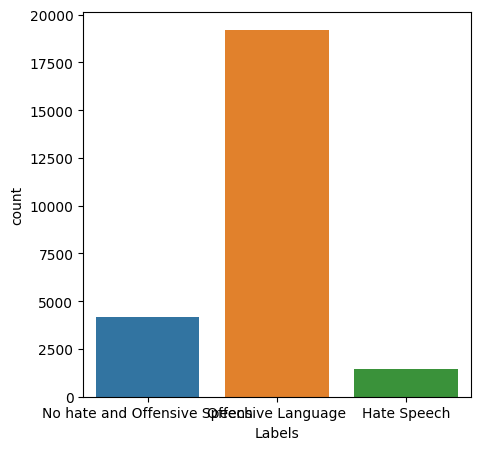

In [100]:
fig = plt.figure(figsize = (5,5))
sns.countplot( x = 'Labels', data = df)

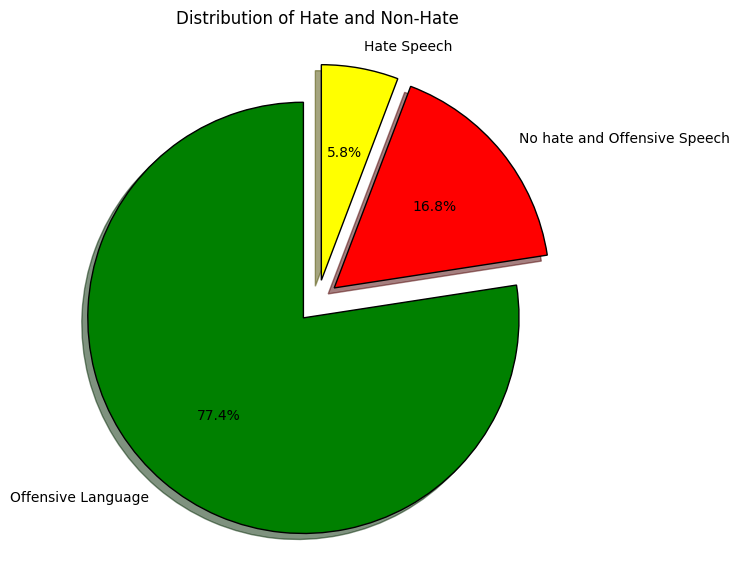

In [101]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
colors = ("green", "red","yellow")
wp = {'linewidth': 1, 'edgecolor': "black"}
tags = df['Labels'].value_counts()

# Calculate explode list dynamically
explode = [0.1] * len(tags)

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of Hate and Non-Hate")
plt.show()


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   24783 non-null  object
 1   Labels  24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


In [103]:
import re

def clean_urdu_sentence(text):
    # Remove non-Urdu characters except space
    text = re.sub(r'[^؀-ۿ ]', '', text)

    return text

# Apply the cleaning function to the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(clean_urdu_sentence)


In [104]:
df.head()

,Tweet,Labels
0,ایک عورت کے طور پر آپ کو اپنے گھر کی صفائی...,No hate and Offensive Speech
1,لڑکا ٹھنڈا ہے ٹائیگا ڈان براڈ فار کفن ڈاٹ ...,Offensive Language
2,آپ نے کبھی کسی کتیا کو چود لیا ہے اور و...,Offensive Language
3,وہ ایک ٹرانی کی طرح نظر آتی ہے۔,Offensive Language
4,آپ نے میرے بارے میں جو گندگی سنی ہے وہ سچ ...,Offensive Language


In [105]:
#Filter Non hated tweet
non_hated_tweet = df[df.Labels == 'No hate and Offensive Speech']

In [106]:
non_hated_tweet.head()

,Tweet,Labels
0,ایک عورت کے طور پر آپ کو اپنے گھر کی صفائی...,No hate and Offensive Speech
40,ماں نے کہا کہ میرے کتے کے گھر میں بلی نہیں ہے,No hate and Offensive Speech
63,,No hate and Offensive Speech
66,اور گرم تلوے,No hate and Offensive Speech
67,ایک کھاؤ اور یہ پکوان کرو۔ ایک ؟,No hate and Offensive Speech


In [107]:
def remove_stop_nonHate(x):
    return " ".join([word for word in str(x).split() if word not in stopwords_urdu])

non_hated_tweet['Tweet'] = non_hated_tweet['Tweet'].apply(lambda x : remove_stop_nonHate(x))

<ipython-input-107-a036783eb620>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_hated_tweet['Tweet'] = non_hated_tweet['Tweet'].apply(lambda x : remove_stop_nonHate(x))


In [108]:
import re

def remove_urdu_stopwords(sentence):
    words = re.findall(r'\b\w+\b', sentence)
    filtered_words = [word for word in words if word not in stopwords_urdu]
    filtered_sentence = ' '.join(filtered_words)
    return filtered_sentence

# Assuming you have a pandas DataFrame named 'tweet_df' with columns 'Text' and 'Labels'
df['Tweet'] = df['Tweet'].apply(remove_urdu_stopwords)



In [109]:
df.head()

,Tweet,Labels
0,عورت آپ کو گھر صفائی بارے شکایت کرنی چاہیے آدم...,No hate and Offensive Speech
1,لڑکا ٹھنڈا ہے ٹائیگا ڈان براڈ فار کفن ڈاٹ پہلے...,Offensive Language
2,آپ نے کتیا کو چود لیا ہے وہ رونے ہے آپ گندگی ا...,Offensive Language
3,وہ ٹرانی نظر آتی ہے,Offensive Language
4,آپ نے بارے گندگی سنی ہے وہ سچ سکتی ہے کتیا سے ...,Offensive Language


In [110]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(df['Tweet'])

In [111]:
feature_names = list(vect.vocabulary_.keys())
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))


Number of features: 113796

First 20 features:
['عورت', 'آپ', 'کو', 'گھر', 'صفائی', 'بارے', 'شکایت', 'کرنی', 'چاہیے', 'آدمی', 'ناطے', 'ہمیشہ', 'کچرا', 'اٹھانا', 'عورت آپ', 'آپ کو', 'کو گھر', 'گھر صفائی', 'صفائی بارے', 'بارے شکایت']


In [112]:
x = np.array(df["Tweet"])
y = np.array(df["Labels"])

In [113]:
cv = CountVectorizer()

In [114]:
X = cv.fit_transform(x)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [116]:
# model = DecisionTreeClassifier()
model = LogisticRegression()

In [117]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
y_pred = model.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
print("Accuracy Score of Model", accuracy_score(y_test,y_pred))

Accuracy Score of Model 0.8581803510187613


 !!! RT @mayasolovely: ایک عورت کے طور پر آپ کو اپنے گھر کی صفائی کے بارے میں شکایت نہیں کرنی چاہیے۔ &amp; ایک آدمی ہونے کے ناطے آپ کو ہمیشہ کچرا اٹھانا چاہیے...

In [121]:
input = " ایک عورت کے طور پر آپ کو اپنے گھر کی صفائی کے بارے میں شکایت نہیں کرنی چاہیے۔; ایک آدمی ہونے کے ناطے آپ کو ہمیشہ کچرا اٹھانا چاہیے..."
input = cv.transform([input]).toarray()
print(model.predict(input))

['No hate and Offensive Speech']


In [122]:
#input = " ایک عورت کے طور پر آپ کو اپنے گھر کی صفائی کے بارے میں شکایت نہیں کرنی چاہیے۔; ایک آدمی ہونے کے ناطے آپ کو ہمیشہ کچرا اٹھانا چاہیے..."
input = "آپ بہت اچھے ہیں۔"
input = cv.transform([input]).toarray()
print(model.predict(input))

['Offensive Language']
